# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.5.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
145771,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145772,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145773,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145774,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145775,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
145771,2020-07-12,Colombia,Vichada,1,0,0,1
145772,2020-07-13,Colombia,Vichada,1,0,0,1
145773,2020-07-14,Colombia,Vichada,1,0,0,1
145774,2020-07-15,Colombia,Vichada,1,0,0,1
145775,2020-07-16,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
179,2020-07-12,7927,1433,325,6169
180,2020-07-13,8046,1498,325,6223
181,2020-07-14,8189,1528,325,6336
182,2020-07-15,8354,1556,326,6472
183,2020-07-16,8640,1706,326,6608


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-12,19411201,9485532,832620,9093049,0.042894,0.468443,0.083886
2020-07-13,19684549,9571948,837489,9275112,0.042546,0.471187,0.082816
2020-07-14,20044525,9745188,844551,9454786,0.042134,0.471689,0.082001
2020-07-15,20358883,9846940,851517,9660426,0.041825,0.474507,0.081005
2020-07-16,20360434,9847872,851520,9661042,0.041822,0.474501,0.081000


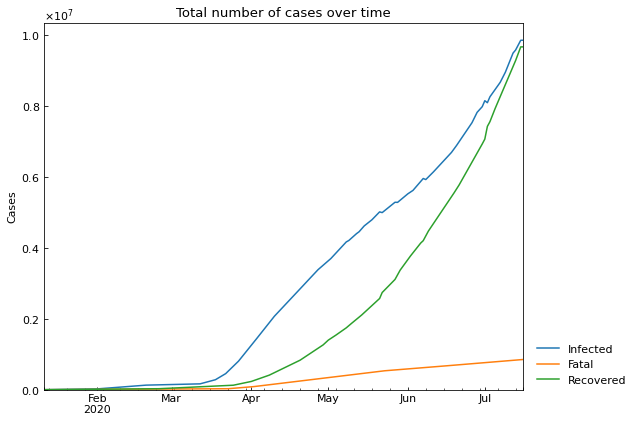

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
183,2020-07-12,21937,2955,982,18000
184,2020-07-13,22197,3114,983,18100
185,2020-07-14,22530,3271,983,18276
186,2020-07-15,22982,3460,984,18538
187,2020-07-16,23603,3810,984,18809


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282
155,2020-07-15,22508,2979,984,18545


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
145771,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145772,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145773,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145774,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145775,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
783,CZE,Czech Republic,Plzenský kraj,584672
784,COL,Colombia,Bolívar,2070110
785,RUS,Russia,Murmansk oblast,795409
786,RUS,Russia,Republic of Crimea,1913731
787,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
145771,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145772,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145773,2020-07-14,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145774,2020-07-15,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
145775,2020-07-16,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
145771,2020-07-12,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
145772,2020-07-13,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
145773,2020-07-14,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
145774,2020-07-15,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
145775,2020-07-16,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78
187,2020-07-16,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78
185,2020-07-14,2,0,1,0,0,0,0,3,2,2,1,27.78
186,2020-07-15,2,0,1,0,0,0,0,3,2,2,1,27.78
187,2020-07-16,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

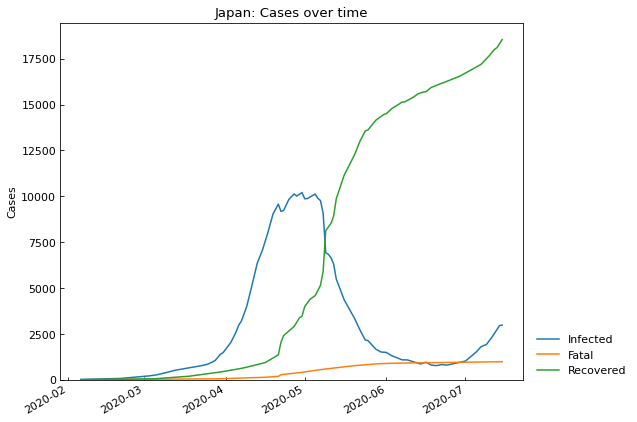

,Date,Confirmed,Infected,Fatal,Recovered
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003
153,2020-07-13,21868,2783,982,18103
154,2020-07-14,22220,2956,982,18282
155,2020-07-15,22508,2979,984,18545


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

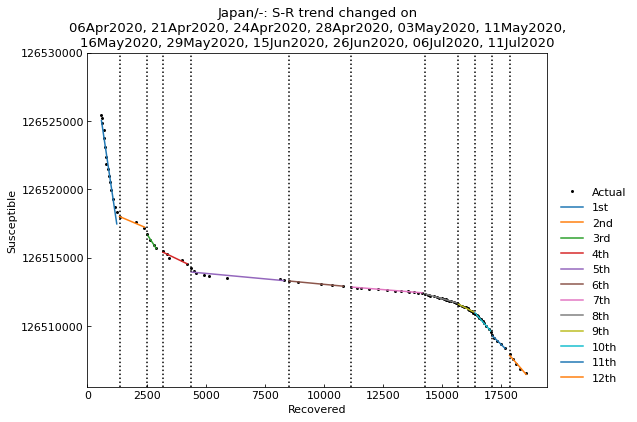

,Type,Start,End,Population
1st,Past,06Apr2020,20Apr2020,126529100
2nd,Past,21Apr2020,23Apr2020,126529100
3rd,Past,24Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,10May2020,126529100
6th,Past,11May2020,15May2020,126529100
7th,Past,16May2020,28May2020,126529100
8th,Past,29May2020,14Jun2020,126529100
9th,Past,15Jun2020,25Jun2020,126529100
10th,Past,26Jun2020,05Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	12th phase with SIR-F model finished 207 trials in 0 min 25 sec.

	1st phase with SIR-F model finished 167 trials in 0 min 20 sec.

	2nd phase with SIR-F model finished 88 trials in 0 min 10 sec.

	3rd phase with SIR-F model finished 99 trials in 0 min 10 sec.

	4th phase with SIR-F model finished 91 trials in 0 min 10 sec.

	5th phase with SIR-F model finished 96 trials in 0 min 10 sec.

	6th phase with SIR-F model finished 43 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 51 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 31 trials in 0 min 5 sec.

	9th phase with SIR-F model finished 31 trials in 0 min 5 sec.

	10th phase with SIR-F model finished 32 trials in 0 min 5 sec.

	11th phase with SIR-F model finished 33 trials in 0 min 5 sec.

Completed optimization. Total: 2 min 1 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,06Apr2020,20Apr2020,126529100,SIR-F,0.078633,0.008839,0.011122,0.000488,1440,8.34,0.011,2049,12,113,0.170568,167,0 min 20 sec
2nd,Past,21Apr2020,23Apr2020,126529100,SIR-F,0.042741,0.056139,0.096793,0.000692,1440,0.68,0.097,1444,23,17,0.042844,88,0 min 10 sec
3rd,Past,24Apr2020,27Apr2020,126529100,SIR-F,0.032755,0.012597,0.040459,0.000184,1440,2.46,0.040,5437,30,79,0.007899,99,0 min 10 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.026560,0.023305,0.094105,0.000826,1440,1.00,0.094,1210,37,42,0.038876,91,0 min 10 sec
5th,Past,03May2020,10May2020,126529100,SIR-F,0.014214,0.036726,0.174816,0.000450,1440,0.32,0.175,2224,70,27,0.116422,96,0 min 10 sec
6th,Past,11May2020,15May2020,126529100,SIR-F,0.020596,0.089924,0.157772,0.001978,1440,0.19,0.158,505,48,11,0.025456,43,0 min 5 sec
7th,Past,16May2020,28May2020,126529100,SIR-F,0.014009,0.089842,0.157772,0.001978,1440,0.13,0.158,505,71,11,0.033353,51,0 min 5 sec
8th,Past,29May2020,14Jun2020,126529100,SIR-F,0.040300,0.068799,0.167020,0.003847,1440,0.46,0.167,259,24,14,0.086084,31,0 min 5 sec
9th,Past,15Jun2020,25Jun2020,126529100,SIR-F,0.076442,0.064917,0.169550,0.010527,1440,0.84,0.170,94,13,15,0.077481,31,0 min 5 sec
10th,Past,26Jun2020,05Jul2020,126529100,SIR-F,0.137966,0.065326,0.049588,0.010755,1440,1.72,0.050,92,7,15,0.067985,32,0 min 5 sec


### Accuracy of estimation

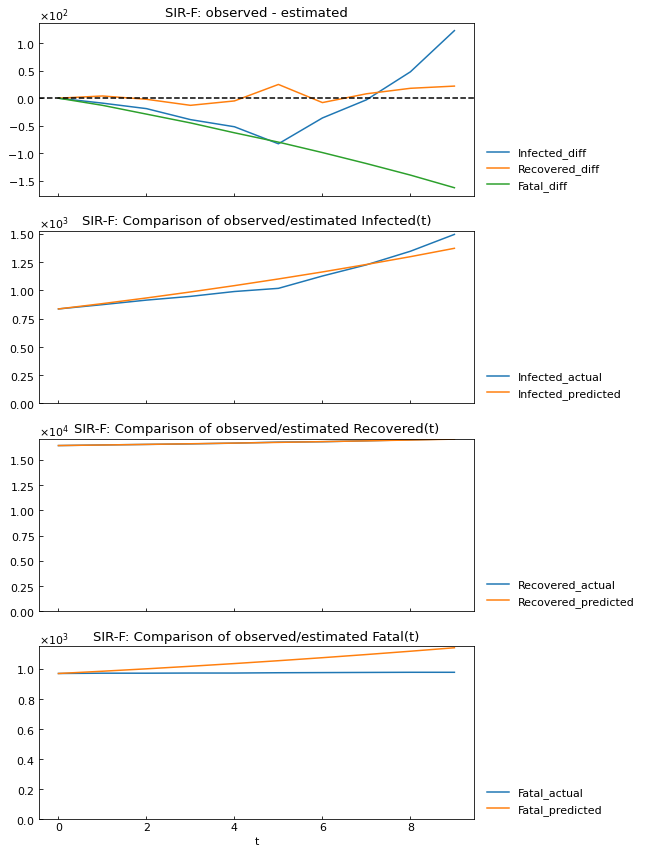

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

1.0

### Show parameter history

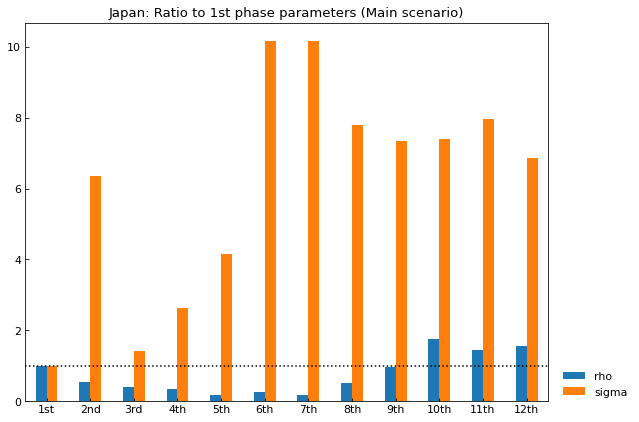

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th
rho,1.0,0.543543,0.416557,0.337769,0.180764,0.261930,0.178156,0.512501,0.972128,1.754550,1.434865,1.570382
sigma,1.0,6.351004,1.425120,2.636462,4.154860,10.173148,10.163944,7.783348,7.344079,7.390416,7.947966,6.868361


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

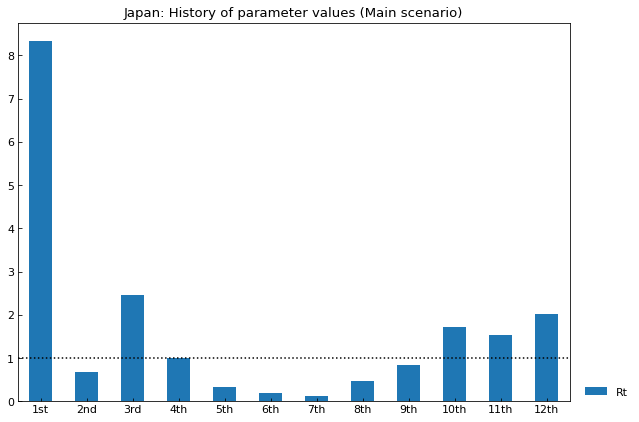

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th
Rt,8.34,0.68,2.46,1.0,0.32,0.19,0.13,0.46,0.84,1.72,1.54,2.01


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

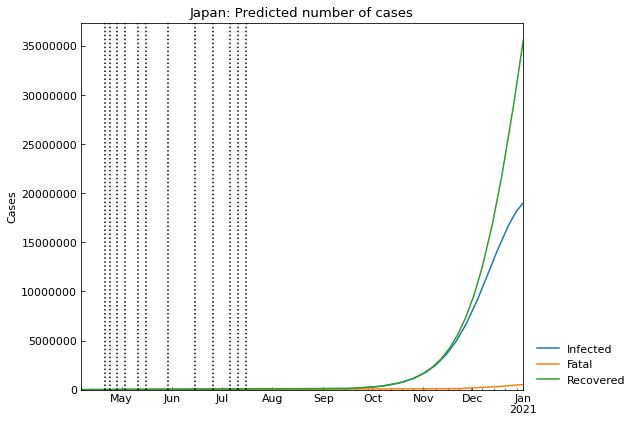

,Date,Susceptible,Infected,Recovered,Fatal
266,28Dec2020,76789380,18205824,31061772,472127
267,29Dec2020,75427306,18441201,32174648,485948
268,30Dec2020,74072967,18655190,33301186,499761
269,31Dec2020,72728659,18846915,34439984,513544
270,01Jan2021,71396714,19015544,35589568,527277


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.06071161309990403

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.12142322619980805

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.078633   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.042741   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.032755   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.026560   
         5th      Past  03May2020  10May2020   126529100  SIR-F  0.014214   
         6th      Past  11May2020  15May2020   126529100  SIR-F  0.020596   
         7th      Past  16May2020  28May2020   126529100  SIR-F  0.014009   
         8th      Past  29May2020  14Jun2020   126529100  SIR-F  0.040300   
         9th      Past  15Jun2020  25Jun2020   126529100  SIR-F  0.076442   
         10th     Past  26Jun2020  05Jul2020   126529100  SIR-F  0.137966   
         11th     Past  06Jul2020  10Jul2020   126529100  SIR-F  0.112828   
         12th     Past  11Jul2020  15Jul2020   126529100  SIR-F  0.123484   
         13th   Future  16Jul2020  01Jan2021   126529100  SIR-F  0.123484   
Medicine 1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.078633   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.042741   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.032755   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.026560   
         5th      Past  03May2020  10May2020   126529100  SIR-F  0.014214   
         6th      Past  11May2020  15May2020   126529100  SIR-F  0.020596   
         7th      Past  16May2020  28May2020   126529100  SIR-F  0.014009   
         8th      Past  29May2020  14Jun2020   126529100  SIR-F  0.040300   
         9th      Past  15Jun2020  25Jun2020   126529100  SIR-F  0.076442   
         10th     Past  26Jun2020  05Jul2020   126529100  SIR-F  0.137966   
         11th     Past  06Jul2020  10Jul2020   126529100  SIR-F  0.112828   
         12th     Past  11Jul2020  15Jul2020   126529100  SIR-F  0.123484   
         13th   Future  16Jul2020  15Aug2020   126529100  SIR-F  0.123484   
         14th   Future  16Aug2020  01Jan2021   126529100  SIR-F  0.123484   

                   sigma     theta     kappa   tau    Rt  alpha1 [-]  \
Scenario Phase                                                         
Main     1st    0.008839  0.011122  0.000488  1440  8.34       0.011   
         2nd    0.056139  0.096793  0.000692  1440  0.68       0.097   
         3rd    0.012597  0.040459  0.000184  1440  2.46       0.040   
         4th    0.023305  0.094105  0.000826  1440  1.00       0.094   
         5th    0.036726  0.174816  0.000450  1440  0.32       0.175   
         6th    0.089924  0.157772  0.001978  1440  0.19       0.158   
         7th    0.089842  0.157772  0.001978  1440  0.13       0.158   
         8th    0.068799  0.167020  0.003847  1440  0.46       0.167   
         9th    0.064917  0.169550  0.010527  1440  0.84       0.170   
         10th   0.065326  0.049588  0.010755  1440  1.72       0.050   
         11th   0.070255  0.000294  0.003008  1440  1.54       0.000   
         12th   0.060712  0.007247  0.000215  1440  2.01       0.007   
         13th   0.060712  0.007247  0.000215  1440  2.01       0.007   
Medicine 1st    0.008839  0.011122  0.000488  1440  8.34       0.011   
         2nd    0.056139  0.096793  0.000692  1440  0.68       0.097   
         3rd    0.012597  0.040459  0.000184  1440  2.46       0.040   
         4th    0.023305  0.094105  0.000826  1440  1.00       0.094   
         5th    0.036726  0.174816  0.000450  1440  0.32       0.175   
         6th    0.089924  0.157772  0.001978  1440  0.19       0.158   
         7th    0.089842  0.157772  0.001978  1440  0.13       0.158   
         8th    0.068799  0.167020  0.003847  1440  0.46       0.167   
         9th    0.064917  0.169550  0.010527  1440  0.84       0.170   
         10th   0.065326  0.049588  0.010755  1440  1.72

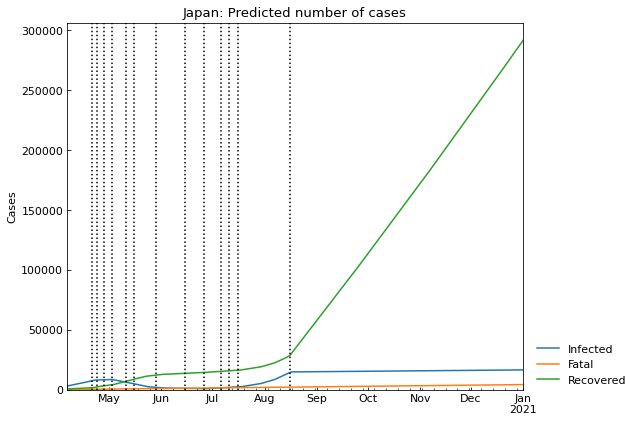

,Date,Susceptible,Infected,Recovered,Fatal
266,28Dec2020,126224754,16469,283697,4185
267,29Dec2020,126222724,16479,285697,4203
268,30Dec2020,126220693,16490,287699,4222
269,31Dec2020,126218661,16501,289702,4240
270,01Jan2021,126216628,16512,291706,4258


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,19015544,01Jan2021,19015544,527277
Medicine,16512,01Jan2021,16512,4258
